# Прогнозирование вероятности оттока пользователей для фитнес-центров

## Описание проекта

С использованием машинного обучения необходимо спрогнозировать вероятность
оттока (на уровне следующего месяца) для каждого клиента фитнес-центра; сформировать типичные
портреты пользователей: выделить наиболее яркие группы, охарактеризовать их
основные свойства; проанализировать основные признаки, наиболее сильно влияющие
на отток.

## План проекта

### [1. Открытие файла с данными и изучение общей информации](#1)      

### [2. Исследовательский анализ данных (EDA)](#2)

[2.1. Изучение данных на предмет отсутствующих признаков, изучение средних значений и стандартных отклонений](#21)     
[2.2. Изучение средних значений признаков в двух группах - ушедших и оставшихся](#22)     
[2.3. Построение столбчатых гистограмм и распределения признаков для ушедших и оставшихся](#23)
[2.4. Расчет матрицы корреляции и построение тепловой карты](#24)

### [3. Построение модели прогнозирования оттока пользователей](#3)

[3.1. Разделение данных на обучающую и валидационную выборку](#31)     
[3.2. Стандартизация данных](#32)     
[3.3. Обучение модели логистической регрессией](#33)     
[3.4. Обучение модели случайным лесом](#34)     
[3.5. Оценка метрик и сравнение моделей](#35)     

### [4. Кластеризация пользователей](#4)

[4.1. Стандартизация данных](#41)      
[4.2. Расчет матрицы расстояний функцией linkage() и построение дендрограммы](#42)    
[4.3. Обучение модели кластеризации на основании алгоритма K-Means и прогноз кластеров клиентов](#43)    
[4.4. Анализ средних значений признаков для кластеров](#44)    
[4.5. Анализ распределения признаков для кластеров](#45)     
[4.6. Расчет доли оттока для каждого кластера](#46)    

### [5. Общие выводы и рекомендации](#5)

[5.1. Общие выводы](#51)      
[5.2. Рекомендации](#52)

## <a name=1> 1. Открытие файла с данными и изучение общей информации </a>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
data.shape

(4000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [6]:
data.isna().count()

gender                               4000
Near_Location                        4000
Partner                              4000
Promo_friends                        4000
Phone                                4000
Contract_period                      4000
Group_visits                         4000
Age                                  4000
Avg_additional_charges_total         4000
Month_to_end_contract                4000
Lifetime                             4000
Avg_class_frequency_total            4000
Avg_class_frequency_current_month    4000
Churn                                4000
dtype: int64

Таблица data содержит данные клиентов фитнес-центра. В таблице 14 столбцов и 4000 строк. Пропущенных данных нет. 

## <a name=2>2. Исследовательский анализ данных (EDA) </a>

### <a name=21>2.1. Изучение данных на предмет отсутствующих признаков, изучение средних значений и стандартных отклонений </a>

In [7]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


В столбцах Contract_period, Age, Avg_additional_charges_total, Month_to_end_contract, Lifetime, Avg_class_frequency_total, Avg_class_frequency_current_month содержатся количественные данные; в столбцах gender, Near_Location, Partner, Promo_friends, Phone, Group_visits, Churn - бинарные.  

Среднестатистический клиент фитнес-центра - это мужчична около тридцати лет, проживающий или работающий в районе нахождения фитнес-центра. Среднестатистический клиент не является сотрудником компании-партнера клуба, не пользовался рекомендациями друзей при выборе клуба и не посещает групповые занятия. Как правило, длительность действующего контракта - 1 месяц. Затраты среднего клиента на дополнительные услуги клуба составляют 136 единиц. Срок пользования услугами клуба - 3 месяца. Средний клиент посещает фитнес-центр дважды в неделю.

In [8]:
data.query('Churn == 0')['Churn'].count()

2939

In [9]:
data.query('Churn == 1')['Churn'].count()

1061

В анализируемых данных доля оставшихся - 75%, доля ушедших - 25%. Анализируемая выборка несбалансирована.

### <a name=22> 2.2. Изучение средних значений признаков в двух группах - ушедших и оставшихся</a>

In [10]:
data.groupby(by='Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### <a name=23>2.3. Построение столбчатых гистограмм и распределения признаков для ушедших и оставшихся </a>

In [11]:
data_ch = data.query('Churn == 1').drop('Churn', axis=1)

In [12]:
data_noch = data.query('Churn == 0').drop('Churn', axis=1)

Построим диаграммы boxplot и гистограммы распределения для количественных признаков.

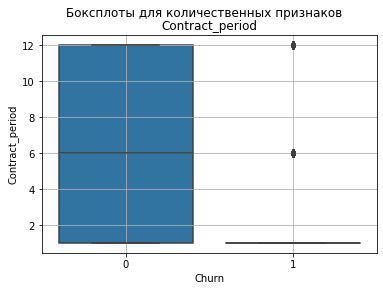

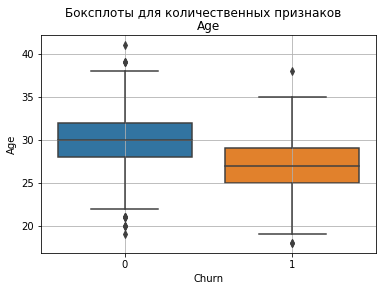

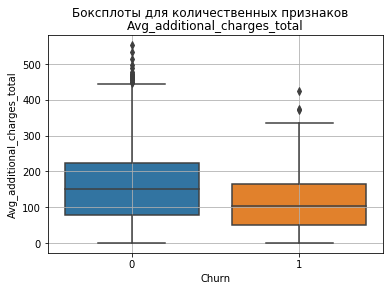

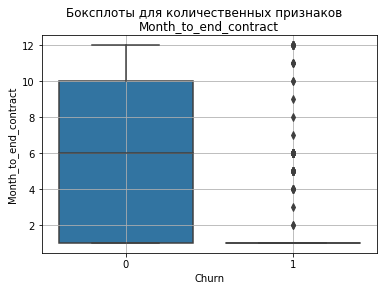

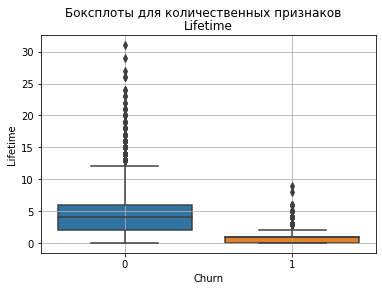

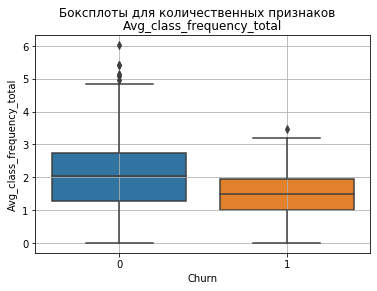

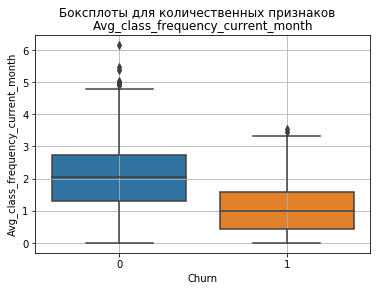

In [13]:
for feature in data[['Contract_period','Age','Avg_additional_charges_total','Month_to_end_contract','Lifetime','Avg_class_frequency_total', 'Avg_class_frequency_current_month']]:
    sns.boxplot(y=data[feature], x=data['Churn'])
    plt.suptitle('Боксплоты для количественных признаков')
    plt.title(feature)
    plt.grid(True)   
    plt.show()

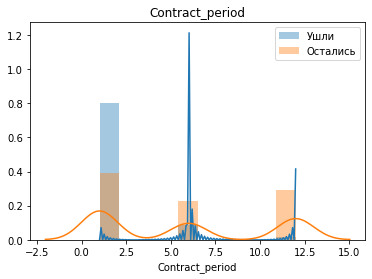

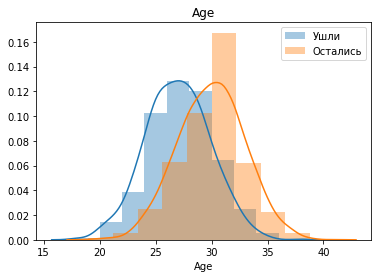

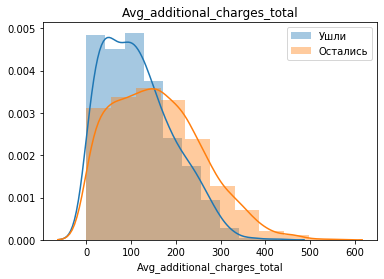

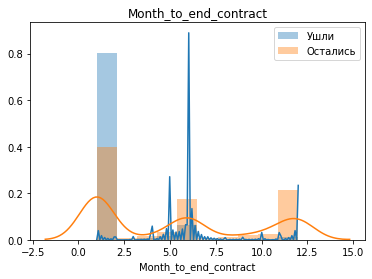

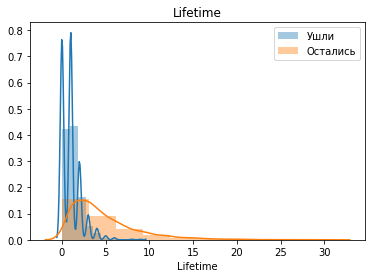

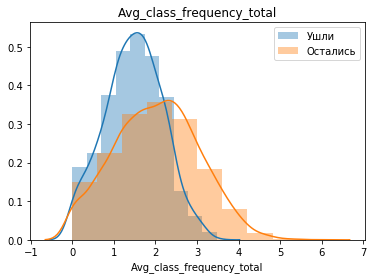

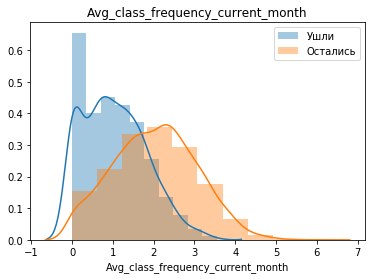

In [14]:
for feature in ('Contract_period','Age','Avg_additional_charges_total','Month_to_end_contract','Lifetime','Avg_class_frequency_total', 'Avg_class_frequency_current_month'):
    sns.distplot(data_ch[feature], bins=10)
    sns.distplot(data_noch[feature], bins=10)
    plt.title(feature)
    plt.legend(('Ушли', 'Остались'))
    plt.show()

Построим графики распределения для бинарных признаков.

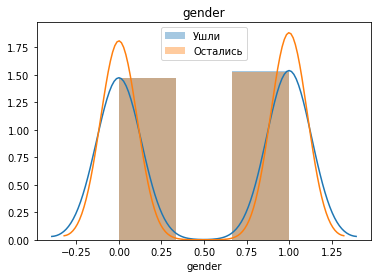

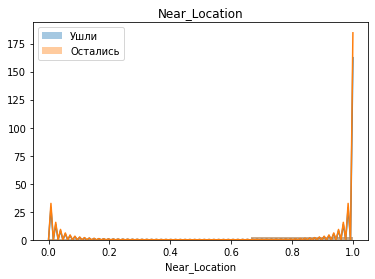

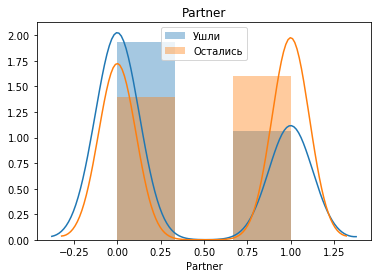

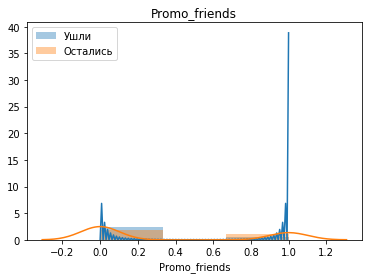

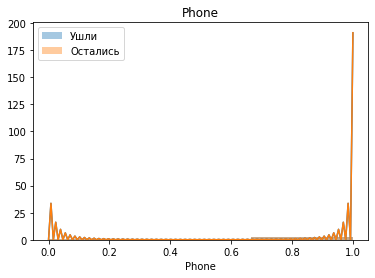

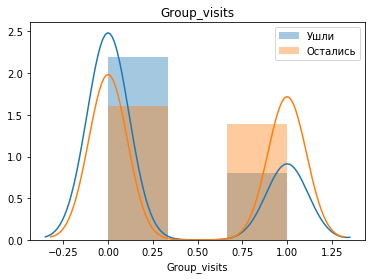

In [15]:
for feature in ('gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits'):
    sns.distplot(data_ch[feature], bins=3)
    sns.distplot(data_noch[feature], bins=3)
    plt.title(feature)
    plt.legend(('Ушли', 'Остались'))
    plt.show()

По виду графиков можно сделать следующие выводы. Ушедшие клиенты чаще заключают контракты на 1 месяц. Контракты оставшихся клмиентов , как правило, значительно длиннее. Средний возраст оставшихся клиентов выше. Оставшиеся клиенты в среднем совершают больше дополнительных трат. Показатель lifetime и частота посещения выше у оставшихся клиентов. Пол клиента,как правило, не влияет на принятие решения об оставлении клуба. Большинство оставшихся клиентов проживают или работают рядом с клубом. Оставшиеся клиенты чаще являются сотрудниками компании-партнёра клуба и чаще посещают групповые занятия, чем клиенты, покинувшие фитнес-центр.   

### <a name=24> 2.4. Расчет матрицы корреляции и построение тепловой карты</a>

Рассчитаем матрицу корреляции.

In [16]:
data.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


Построим тепловую карту по матрице корреляции.

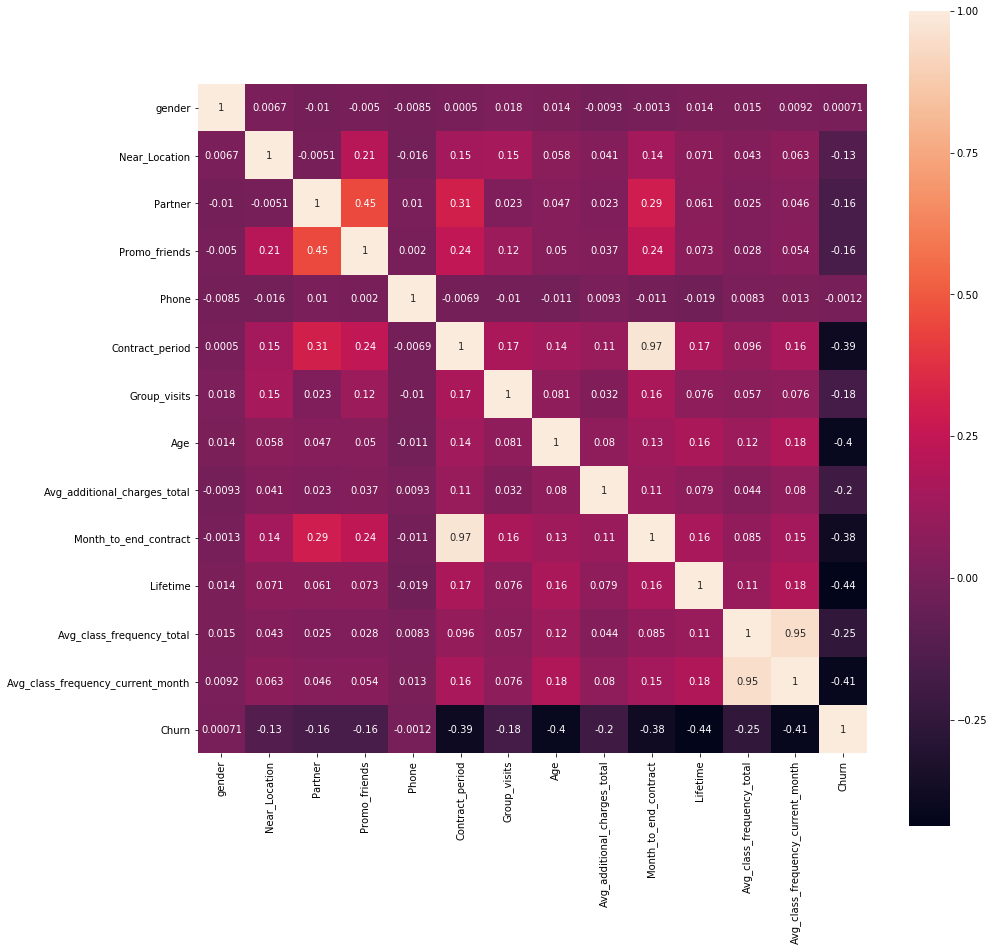

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(data=data.corr(), square=True, annot=True)

С помощью тепловой карты выявлены две пары высококоррелирующих признаков - Avg_class_frequency_current_month / Avg_class_frequency_total и Contract_period / Month_to_end_contract. Чтобы исключить влияние коррелирующих признаков на работу моделей исключим из выборки по одному признаку из каждой пары. Так как глубина требуемого прогноза один месяц, оставим признаки характеризующие месячные показатели - Avg_class_frequency_current_month и Month_to_end_contract.

In [18]:
data.drop(['Avg_class_frequency_total', 'Contract_period'], axis=1, inplace=True)

In [19]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,1,29,14.227470,5.0,3,0.000000,0
1,0,1,0,0,1,1,31,113.202938,12.0,7,1.910244,0
2,0,1,1,0,1,0,28,129.448479,1.0,2,1.736502,0
3,0,1,1,1,1,1,33,62.669863,12.0,2,3.357215,0
4,1,1,1,1,1,0,26,198.362265,1.0,3,1.120078,0


## <a name=3>3. Построение модели прогнозирования оттока пользователей</a>

### <a name=31>3.1. Разделение данных на обучающую и валидационную выборку </a>

In [20]:
X = data.drop('Churn', axis=1)

In [21]:
y = data['Churn']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

### <a name=32> 3.2. Стандартизация данных</a>

In [23]:
scaler = StandardScaler()

In [24]:
X_train_st = scaler.fit_transform(X_train)

In [25]:
X_test_st = scaler.transform(X_test)

### <a name=33> 3.3. Обучение модели логистической регрессией</a>

In [26]:
model_LR = LogisticRegression(random_state=0)

In [27]:
model_LR.fit(X_train_st, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_predict_LR = model_LR.predict(X_test_st)

### <a name=34> 3.4. Обучение модели случайным лесом</a>

In [29]:
model_RFC = RandomForestClassifier(random_state = 0)

In [30]:
model_RFC.fit(X_train_st, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [31]:
y_predict_RFC = model_RFC.predict(X_test_st)

### <a name=35>3.5. Оценка метрик и сравнение моделей </a>

Рассчитаем метрикм для обеих моделей и для лучшего восприятия сформируем таблицу.

In [32]:
metrics = (pd.DataFrame
           ({'Метрики':['Accuracy','Precision','Recall'], 
             'LogisticRegression':[accuracy_score(y_test, y_predict_LR),
                                   precision_score(y_test, y_predict_LR),
                                   recall_score(y_test, y_predict_LR)],
             'RandomForestClassifier':[accuracy_score(y_test, y_predict_RFC),
                                   precision_score(y_test, y_predict_RFC),
                                   recall_score(y_test, y_predict_RFC)]}))

In [33]:
metrics

,Метрики,LogisticRegression,RandomForestClassifier
0,Accuracy,0.913000,0.888000
1,Precision,0.847656,0.837004
2,Recall,0.818868,0.716981


На основании значений метрик можно сделать вывод о том, что модель LogisticRegression показала себя лучше, чем модель RandomForestClassifier. 

## <a name=4> 4. Кластеризация пользователей</a>

### <a name=41>4.1. Стандартизация данных </a>

In [34]:
sc = StandardScaler()

In [35]:
X_sc = sc.fit_transform(X)

### <a name=42>4.2. Расчет матрицы расстояний функцией linkage() и построение дендрограммы</a>

In [36]:
linked = linkage(X_sc, method = 'ward')

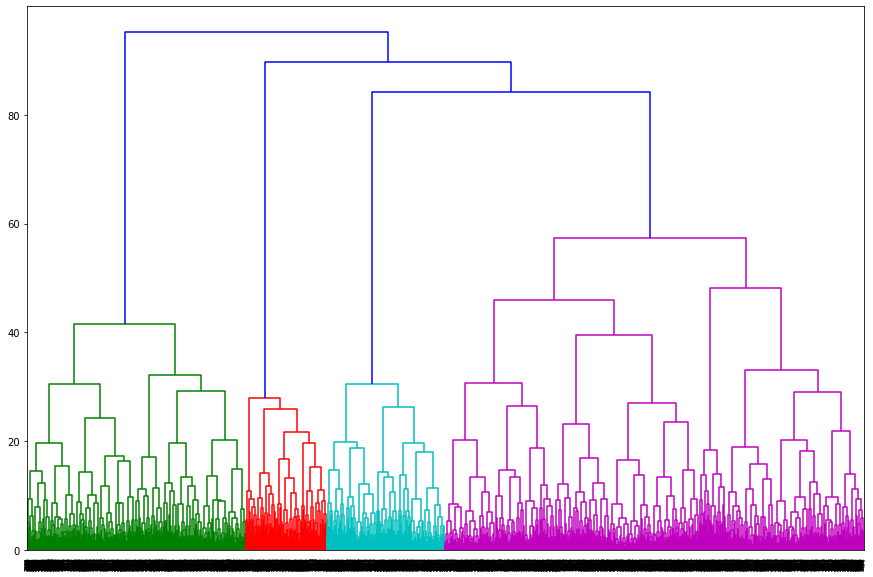

In [37]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

На основании вида дендрограммы можно сделать вывод о разделении выборки на 5 кластеров.

### <a name=43> 4.3. Обучение модели кластеризации на основании алгоритма K-Means и прогноз кластеров клиентов</a>

In [38]:
km = KMeans(n_clusters = 5, random_state=0)

In [39]:
labels = km.fit_predict(X_sc)

In [40]:
data['cluster_km'] = labels 

### <a name=44> 4.4. Анализ средних значений признаков для кластеров</a>

In [41]:
data.groupby(by='cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,
0,0.492000,0.994000,0.953000,1.000000,0.906000,0.528000,29.633000,154.086252,6.730000,4.287000,1.919105,0.108000
1,0.495352,0.998672,0.378486,0.046481,0.903054,0.000000,30.342629,174.392898,4.698539,5.166003,2.237272,0.046481
2,0.510507,1.000000,0.224969,0.114957,0.899876,0.187886,26.800989,111.061687,1.710754,1.422744,0.984420,0.740420
3,0.502455,0.000000,0.489362,0.072013,0.913257,0.232406,28.700491,137.375245,2.826514,3.027823,1.599583,0.400982
4,0.551391,0.998791,0.275695,0.074970,0.897219,1.000000,30.275695,155.484435,4.730351,4.499395,2.044372,0.089480


По средним значениям количественных признаков можно сделать следующие выводы. Наибольшая среднняя дополнительная выручка получена с клиентов, отнесенных к кластеру 1, наименьшая - с клиентов кластера 2. Наибольшее среднее количество месяцев до конца контракта у клиентов кластера 0, наименьшее - у клиентов кластера 2. Наибольшее среднее значение lifetime у клиентов кластера 1, наименьшее - у клиентов кластера 2. Наибольшее количество еженедельных посещений за последний месяц у клиентов кластера 1, наименьшее - у клиентов кластера 2.  

### <a name=45> 4.5. Анализ распределения признаков для кластеров</a>

Построим boxplot для распределения количественных признаков с учетом кластера.

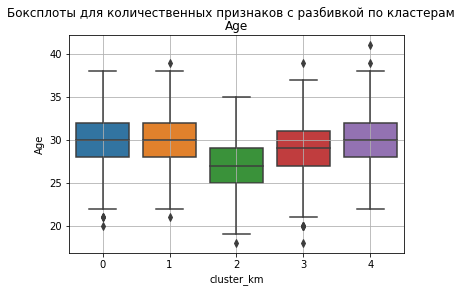

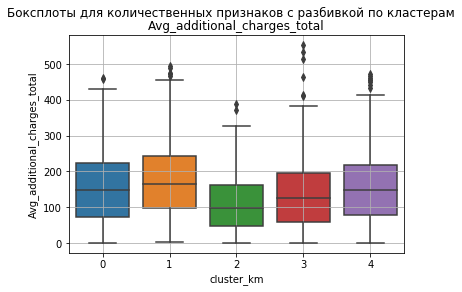

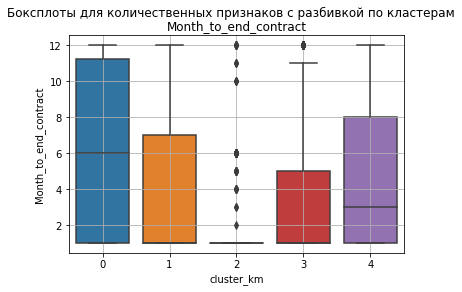

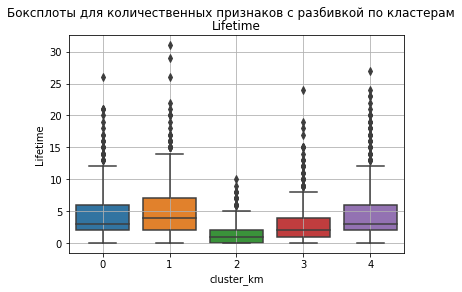

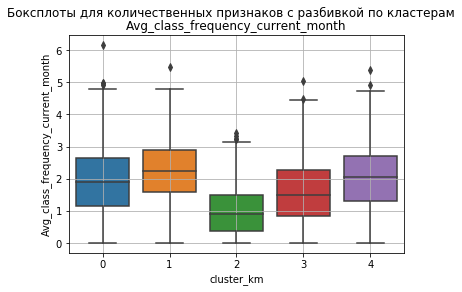

In [42]:
for feature in ('Age','Avg_additional_charges_total','Month_to_end_contract','Lifetime','Avg_class_frequency_current_month'):
    plt.suptitle('Боксплоты для количественных признаков с разбивкой по кластерам')
    sns.boxplot(y=data[feature], x=data['cluster_km'])
    plt.title(feature)
    plt.grid(True)
    plt.show()

Выводы, сделанные при анализе средних значений признаков по кластерам, подтверждаются видом боксплотов. Кластер 1 лидирует по всем признакам, кроме количества месяцев до конца контракта, замыкает пятерку кластер 2. Признаки кластеров 0, 3 и 4 плавно расположены между лидером и аутсайдером. 

Построим гистограммы распределения бинарных признаков с разбиением по кластерам.  

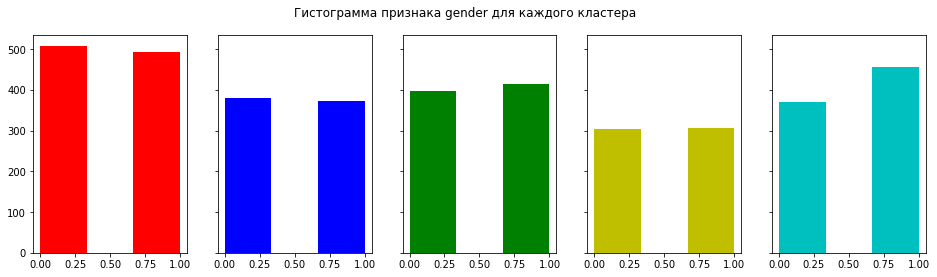

In [43]:
fig, axs = plt.subplots(1, 5, figsize=(16, 4), sharey=True)
plt.suptitle('Гистограмма признака gender для каждого кластера')
axs[0].hist(data.query('cluster_km==0')['gender'], color='r', bins=3)
axs[1].hist(data.query('cluster_km==1')['gender'], color='b', bins=3)
axs[2].hist(data.query('cluster_km==2')['gender'], color='g', bins=3)
axs[3].hist(data.query('cluster_km==3')['gender'], color='y', bins=3)
axs[4].hist(data.query('cluster_km==4')['gender'], color='c', bins=3)
plt.show()

Количество мужчин и женщин в кластерах в целом сбалансировано. По количеству клиентов кластеры 0 и 1 несколько отстают от кластеров 2, 3 и 4.

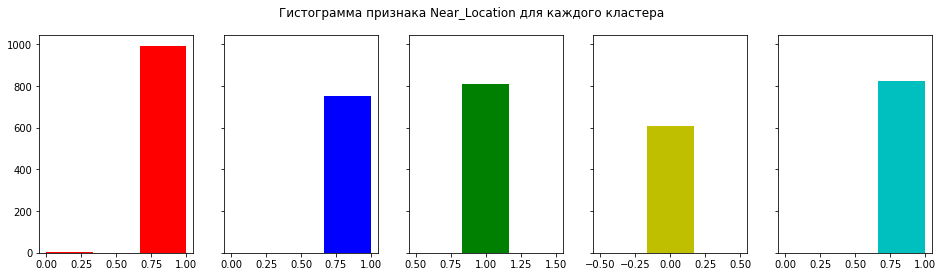

In [44]:
fig, axs = plt.subplots(1, 5, figsize=(16, 4), sharey=True)
plt.suptitle('Гистограмма признака Near_Location для каждого кластера')
axs[0].hist(data.query('cluster_km==0')['Near_Location'], color='r', bins=3)
axs[1].hist(data.query('cluster_km==1')['Near_Location'], color='b', bins=3)
axs[2].hist(data.query('cluster_km==2')['Near_Location'], color='g', bins=3)
axs[3].hist(data.query('cluster_km==3')['Near_Location'], color='y', bins=3)
axs[4].hist(data.query('cluster_km==4')['Near_Location'], color='c', bins=3)
plt.show()

По признаку проживания или работы в районе нахождения фитнес-центра выделяется кластер 3 - в этот кластер помещены клиенты, не проживающие и неработающие в районе нахождения фитнес-центра.

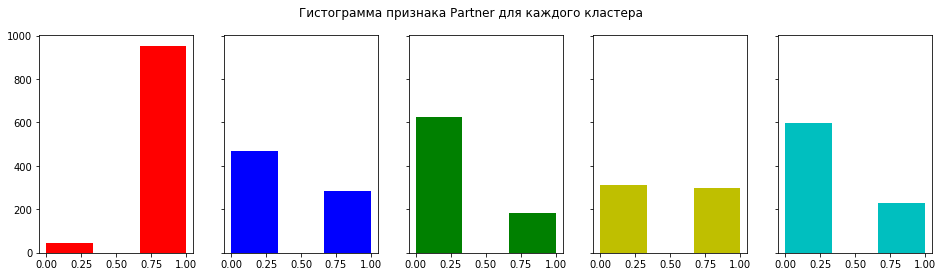

In [45]:
fig, axs = plt.subplots(1, 5, figsize=(16, 4), sharey=True)
plt.suptitle('Гистограмма признака Partner для каждого кластера')
axs[0].hist(data.query('cluster_km==0')['Partner'], color='r', bins=3)
axs[1].hist(data.query('cluster_km==1')['Partner'], color='b', bins=3)
axs[2].hist(data.query('cluster_km==2')['Partner'], color='g', bins=3)
axs[3].hist(data.query('cluster_km==3')['Partner'], color='y', bins=3)
axs[4].hist(data.query('cluster_km==4')['Partner'], color='c', bins=3)
plt.show()

Большинство клиентов, помещенных в кластеры 1, 2 и 4 не являются сотрудниками компании-партнера клуба. В кластере 0 большинство клиентов - сотрудники компании-партнера клуба.

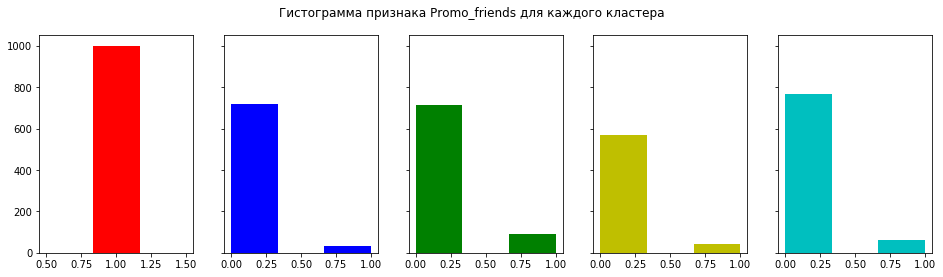

In [46]:
fig, axs = plt.subplots(1, 5, figsize=(16, 4), sharey=True)
plt.suptitle('Гистограмма признака Promo_friends для каждого кластера')
axs[0].hist(data.query('cluster_km==0')['Promo_friends'], color='r', bins=3)
axs[1].hist(data.query('cluster_km==1')['Promo_friends'], color='b', bins=3)
axs[2].hist(data.query('cluster_km==2')['Promo_friends'], color='g', bins=3)
axs[3].hist(data.query('cluster_km==3')['Promo_friends'], color='y', bins=3)
axs[4].hist(data.query('cluster_km==4')['Promo_friends'], color='c', bins=3)
plt.show()

Большинство клиентов, отнесенных к кластерам 1, 2, 3 и 4 не являются участниками акции «приведи друга». Все клиенты, отнесенные к кластеру 0 - участники указанной акции.

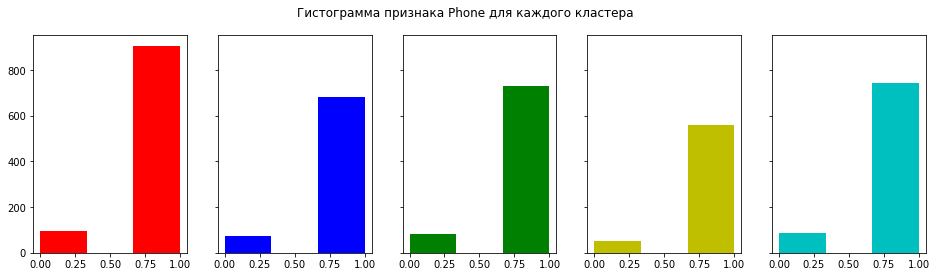

In [47]:
fig, axs = plt.subplots(1, 5, figsize=(16, 4), sharey=True)
plt.suptitle('Гистограмма признака Phone для каждого кластера')
axs[0].hist(data.query('cluster_km==0')['Phone'], color='r', bins=3)
axs[1].hist(data.query('cluster_km==1')['Phone'], color='b', bins=3)
axs[2].hist(data.query('cluster_km==2')['Phone'], color='g', bins=3)
axs[3].hist(data.query('cluster_km==3')['Phone'], color='y', bins=3)
axs[4].hist(data.query('cluster_km==4')['Phone'], color='c', bins=3)
plt.show()

Большинство клиентов из всех кластеров указали в анкете номер телефона.

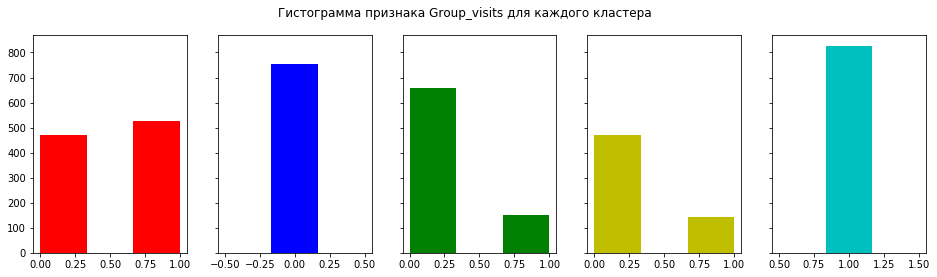

In [48]:
fig, axs = plt.subplots(1, 5, figsize=(16, 4), sharey=True)
plt.suptitle('Гистограмма признака Group_visits для каждого кластера')
axs[0].hist(data.query('cluster_km==0')['Group_visits'], color='r', bins=3)
axs[1].hist(data.query('cluster_km==1')['Group_visits'], color='b', bins=3)
axs[2].hist(data.query('cluster_km==2')['Group_visits'], color='g', bins=3)
axs[3].hist(data.query('cluster_km==3')['Group_visits'], color='y', bins=3)
axs[4].hist(data.query('cluster_km==4')['Group_visits'], color='c', bins=3)
plt.show()

Большинство клиентов, отнесенных к кластерам 2 и 3, не посещают групповые занятия. Все клиенты кластера 4 посещают, а все клиенты кластера 1 не посещают групповые занятия.  

### <a name=46>4.6. Расчет доли оттока для каждого кластера </a>

Расчитаем доли оттока клиентов для каждого кластера.

In [49]:
churn_rate = ((data.query('Churn == 1').groupby(by='cluster_km')['cluster_km'].count() 
     / data.groupby(by='cluster_km')['cluster_km'].count()) * 100)

In [50]:
churn_rate

cluster_km
0    10.800000
1     4.648074
2    74.042027
3    40.098200
4     8.948005
Name: cluster_km, dtype: float64

Самый маленький отток в кластере 1, самый большой - в кластере 2.

## <a name=5>5. Общие выводы и рекомендации </a>

### <a name=51>5.1. Общие выводы </a>

По результатам анализа данных о клиентах фитнес-центра можно сделать следующие выводы.      
В анализируемых данных доля оставшихся - 75%, доля ушедших - 25%. Анализируемая выборка несбалансирована.      
Часть признаков, содержащихся в выборке, количественного характера, часть - бинарного.        
Анализ распределения количественных признаков показал, что возраст оставшихся клиентов в среднем выше возраста клиентов, покинувших фитнес-центр; оставшиеся клиенты совершают больше дополнительных трат, чем покинувшие; показатель lifetime и частота посещения выше у оставшихся клиентов. Анализ распределения бинарных признаков показал, что оставшиеся клиенты чаще являются сотрудниками компании-партнёра клуба и чаще посещают групповые занятия, чем клиенты, покинувшие фитнес-центр.      
В соответствии с видом дендрограммы выборка была разделена на 5 кластеров. Самый маленький отток в кластере 1, самый большой - в кластере 2. Самые верные клиенты (кластер 1) характеризуются большим сроком пользования услугами клуба, большими дополнительными тратами и большим количеством тренировок в неделю.           
По результатам анализа распределения количественных признаков каждого кластера можно сделать следующие выводы. Наибольшая среднняя дополнительная выручка получена с клиентов, отнесенных к кластеру 1, наименьшая - с клиентов кластера 2. Наибольшее среднее количество месяцев до конца контракта у клиентов кластера 0, наименьшее - у клиентов кластера 2. Наибольшее среднее значение lifetime у клиентов кластера 1, наименьшее - у клиентов кластера 2. Наибольшее количество еженедельных посещений за последний месяц у клиентов кластера 1, наименьшее - у клиентов кластера 2. Выводы, сделанные при анализе средних значений признаков по кластерам, подтверждаются видом боксплотов. Кластер 1 лидирует по всем признакам, кроме количества месяцев до конца контракта, замыкает пятерку кластер 2. Признаки кластеров 0, 3 и 4 плавно расположены между лидером и аутсайдером.        
По результатам анализа распределения бинарных признаков каждого кластера можно сделать следующие выводы. Количество мужчин и женщин в кластерах в целом сбалансировано. По признаку проживания или работы в районе нахождения фитнес-центра выделяется кластер 3 - в этот кластер помещены клиенты, не проживающие и неработающие в районе нахождения фитнес-центра. Большинство клиентов, помещенных в кластеры 1, 2 и 4 не являются сотрудниками компании-партнера клуба. В кластере 0 большинство клиентов - сотрудники компании-партнера клуба. Большинство клиентов, отнесенных к кластерам 1, 2, 3 и 4 не являются участниками акции «приведи друга». Все клиенты, отнесенные к кластеру 0 - участники указанной акции. Большинство клиентов из всех кластеров указали в анкете номер телефона. Большинство клиентов, отнесенных к кластерам 2 и 3, не посещают групповые занятия. Все клиенты кластера 4 посещают, а все клиенты кластера 1 не посещают групповые занятия.  

### <a name=52>5.2. Рекомендации </a>

В ходе анализа был выявлен кластер клиентов, имеющий наибольшую долю оттока. Маркетинговые усилия должны быть направлены на удержание клиентов с признаками кластера 2.      
Так как к указанному кластеру отнесены самые молодые клиенты, возможно рассмотреть проведение акций направленных на студентов - студенческие скидки, привлечение к сотрудничеству физкультурных кафедр ВУЗов.       
К указанному кластеру отнесены клиенты с истекающим сроком контракта. Для удержания таких клиентов, необходимо рассмотреть возможность применения скидок при продлении контракта.      
Признаком ушедших клиентов является не участие в групповых занятиях. Возможно необходимо проведение дополнительных рекламных акций для привлечения клиентов к занятиям в группах.      
Большинство отпавших клиентов не были участниками акции «приведи друга». Возможно повторение и расширение указанной акции поможет привязать клиентов к фитнес-центру.
Увеличение количества компаний-партнеров клуба также может повлиять на уменьшение оттока клиентов - большинство ушедших клиентов не было сотрудником комании-партнера клуба.